# DSC550 Milestone 3
## Kaylynn Mosier
## 24 July 2024


# Milestone 1

Everyone loves a good bottle of wine, but choosing that bottle can be a difficult task. Any wine store worth it's weight will have recommendations on deck for their customers. However, these recommendations are often based on the store owners opinions. I prefer a more scientific approach. 

I found a dataset on Kaggle (https://archive.ics.uci.edu/dataset/186/wine+quality) that contains quantitative measurements of different properties of red wine. These observations include acidity, residual sugar, density, pH, alcohol quality and others. Additionally this dataset contains a quality score of the wine, where 0 is the worst and 10 is the best. 

In this analysis, I will use a dataset containing 11 different observations about red wine to predict the quality of a wine. Once I have a trained model with good ability to predict wine quality, I can use the model to predict quality of wines in a non-opinion based way. This information can the be used to recommend wine to store patrons. 

### Exploring the Red Wine Data

In [198]:
# loading required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
# Reading dataset into environment
redwine_data = pd.read_csv("C:/Users/kayly/OneDrive/Desktop/MSDS/DSC550/Final Project/winequality-red.csv", sep=';')
# Print first 10 rows of dataset
redwine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [200]:
# Check shape of dataframe
redwine_data.shape

(1599, 12)

In [201]:
# Check number of NaN values in each column
redwine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

This is thankfully a very clean dataset with no missing values.

In [202]:
# Check data types of each column
redwine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [203]:
# Get descriptive statistics for each column
redwine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Visualizations from Red Wine Data

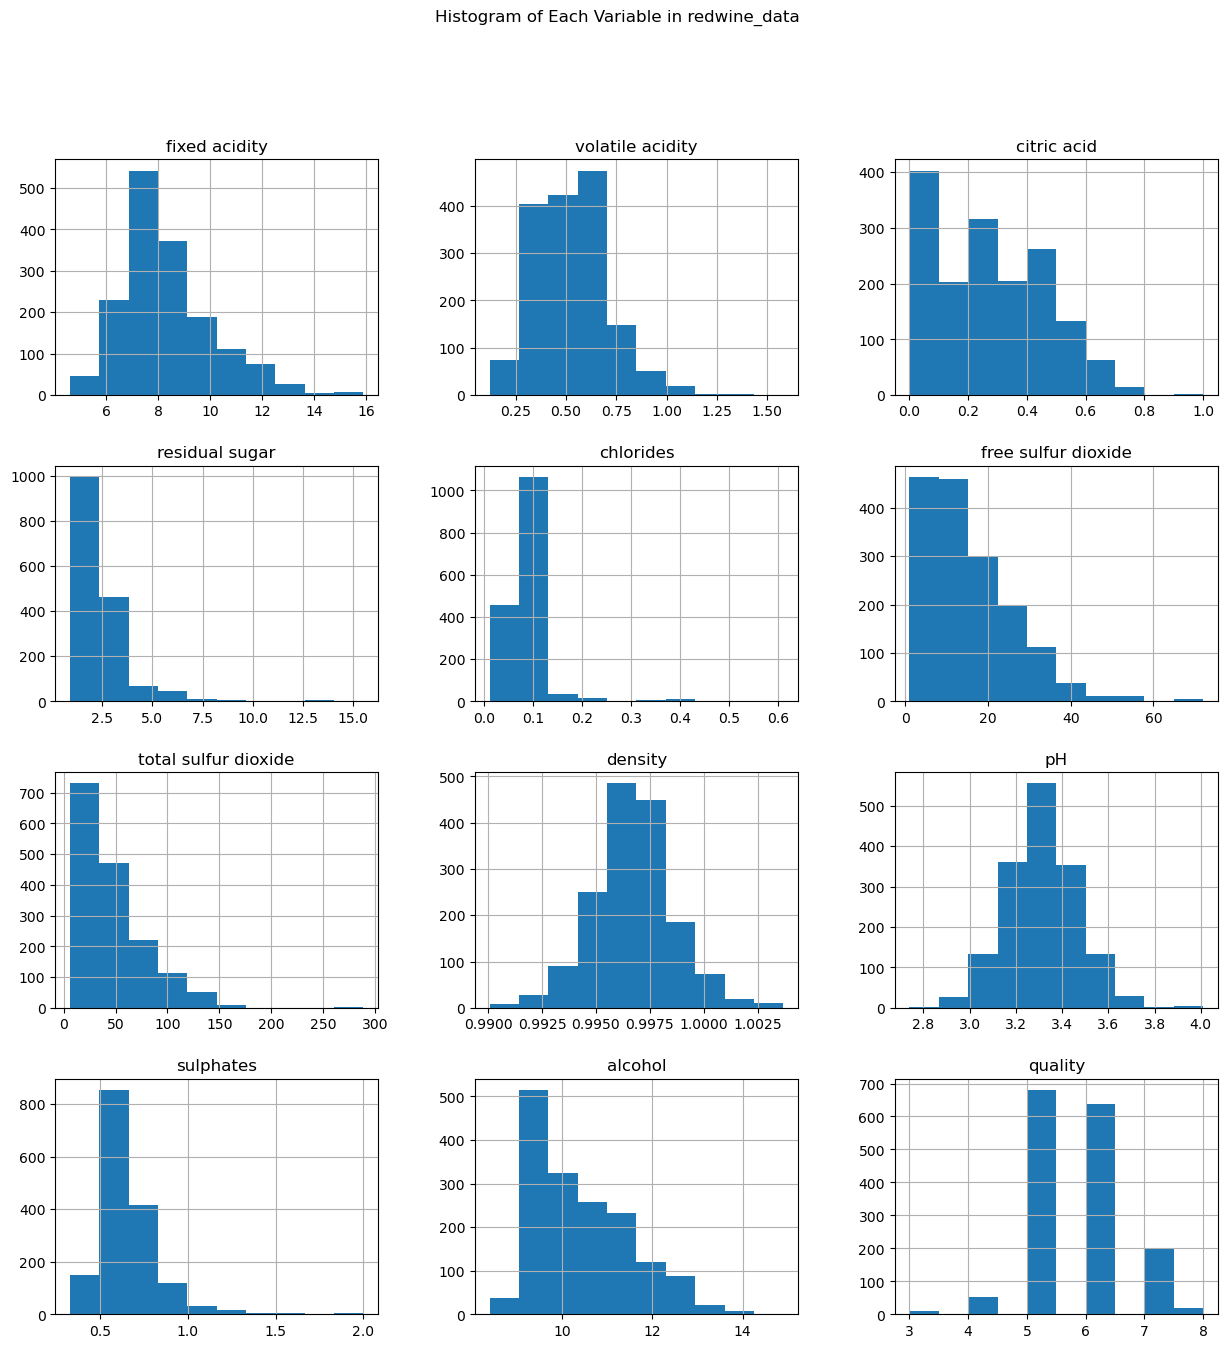

In [204]:
# Histogram of each variable in dataframe
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
fig.suptitle('Histogram of Each Variable in redwine_data')
redwine_data.hist(column='fixed acidity', ax=axes[0,0])
redwine_data.hist(column='volatile acidity', ax=axes[0,1])
redwine_data.hist(column='citric acid', ax=axes[0,2])
redwine_data.hist(column='residual sugar', ax=axes[1,0])
redwine_data.hist(column='chlorides', ax=axes[1,1])
redwine_data.hist(column='free sulfur dioxide', ax=axes[1,2])
redwine_data.hist(column='total sulfur dioxide', ax=axes[2,0])
redwine_data.hist(column='density', ax=axes[2,1])
redwine_data.hist(column='pH', ax=axes[2,2])
redwine_data.hist(column='sulphates', ax=axes[3,0])
redwine_data.hist(column='alcohol', ax=axes[3,1])
redwine_data.hist(column='quality', ax=axes[3,2])
plt.show()

In [205]:
# Checking unique values in quality column
redwine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

From these histograms, I can see that many of these varabiles may contain outliers. I may need to deal with these at a later time, but I don't want to reduce my dataset by too much if it isn't necessary.

This dataset only contains quality observations for 3-8. This will limit our prediction power when wines are on the far end of the scale. It may also bias the model and cause it to predict that wines fall in the middle quality range when they should fall on the outside of the range.

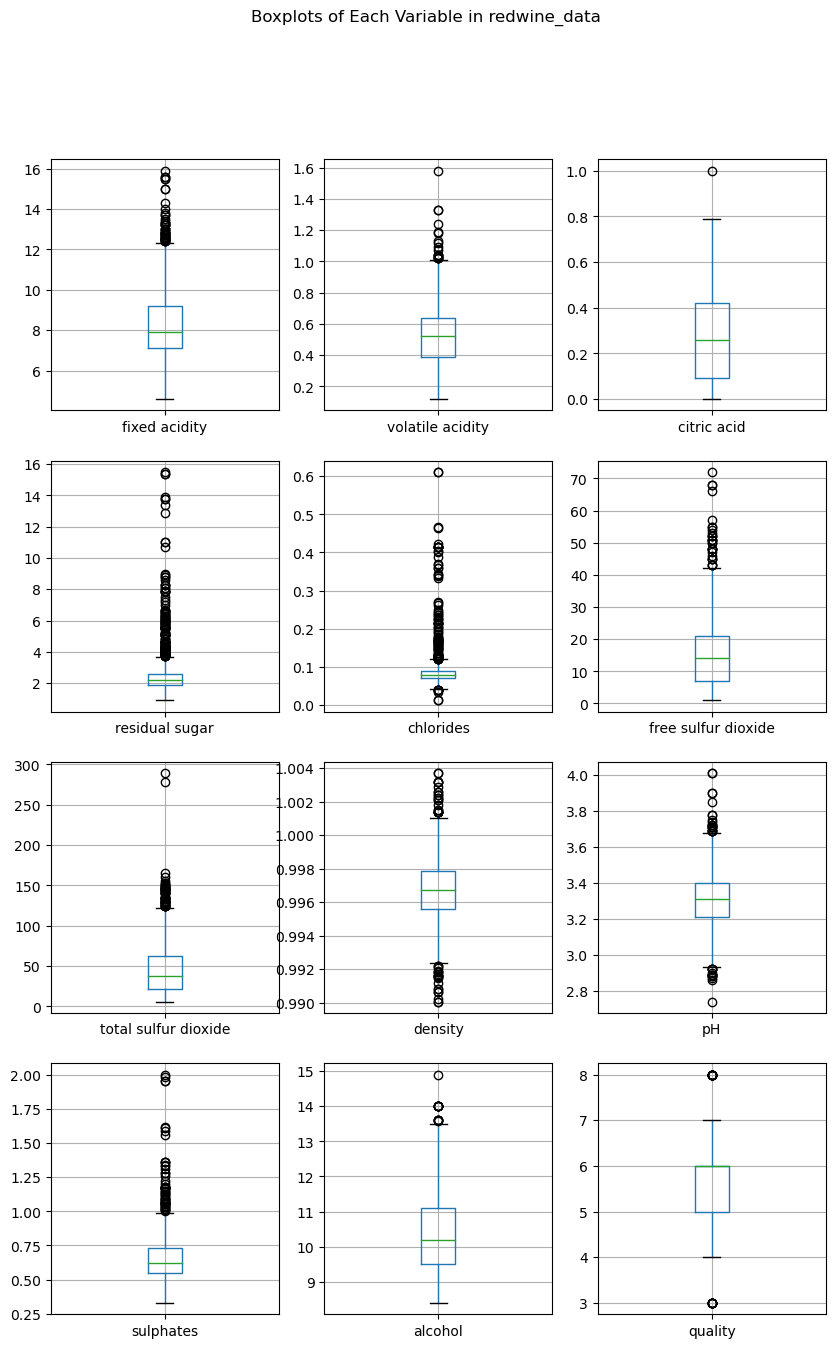

In [206]:
# Boxplot of each variable in dataframe
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,15))
fig.suptitle('Boxplots of Each Variable in redwine_data')
redwine_data.boxplot(column='fixed acidity', ax=axes[0,0])
redwine_data.boxplot(column='volatile acidity', ax=axes[0,1])
redwine_data.boxplot(column='citric acid', ax=axes[0,2])
redwine_data.boxplot(column='residual sugar', ax=axes[1,0])
redwine_data.boxplot(column='chlorides', ax=axes[1,1])
redwine_data.boxplot(column='free sulfur dioxide', ax=axes[1,2])
redwine_data.boxplot(column='total sulfur dioxide', ax=axes[2,0])
redwine_data.boxplot(column='density', ax=axes[2,1])
redwine_data.boxplot(column='pH', ax=axes[2,2])
redwine_data.boxplot(column='sulphates', ax=axes[3,0])
redwine_data.boxplot(column='alcohol', ax=axes[3,1])
redwine_data.boxplot(column='quality', ax=axes[3,2])
plt.show()

These boxplots confirm again that there are many outliers in this dataset. These outliers could bias further evaluations.

<Axes: >

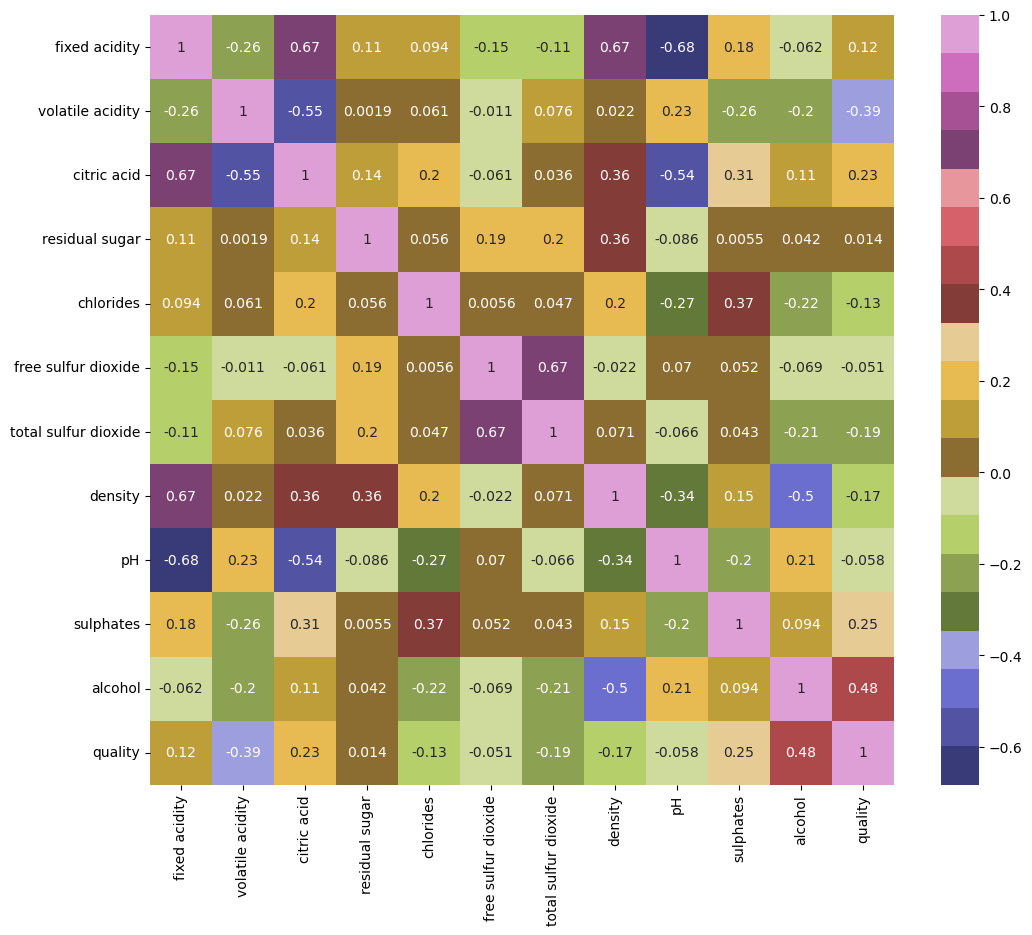

In [207]:
# Heatmap displaying correlation of each variable
corr = redwine_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr,annot=True,cmap='tab20b')

Text(0.5, 1.0, 'Correlation of Variables with Quality for Red Wine Dataset')

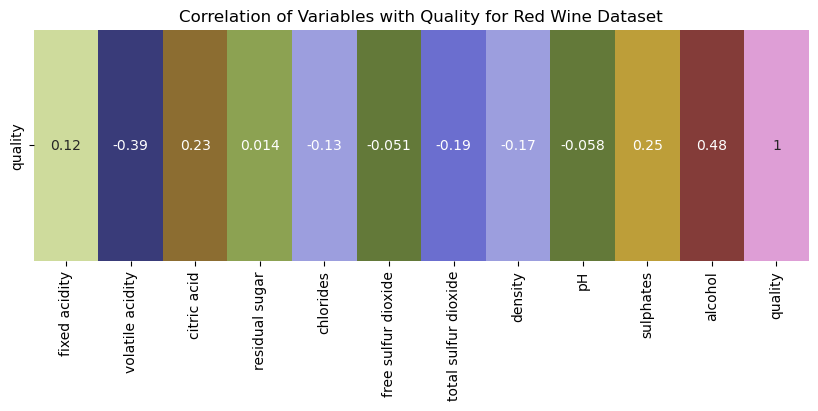

In [208]:
# Correlation matrix of each feature with quality
plt.figure(figsize=(10,3))
sns.heatmap(redwine_data.corr().loc[['quality'],:],annot=True,cmap='tab20b', cbar=False)
plt.title('Correlation of Variables with Quality for Red Wine Dataset')

This heatmap gives me insight into which variables may have the best predictive power. Those with the highest predictive power will have a strong correlation with quality. However, no variables have a very high correlation with quality. It is likely that a combination of variables with moderate or weak correlation with quality will provide adequate predictive power. With this in mind, I will investigate volatile acidity, and alcohol more in depth.

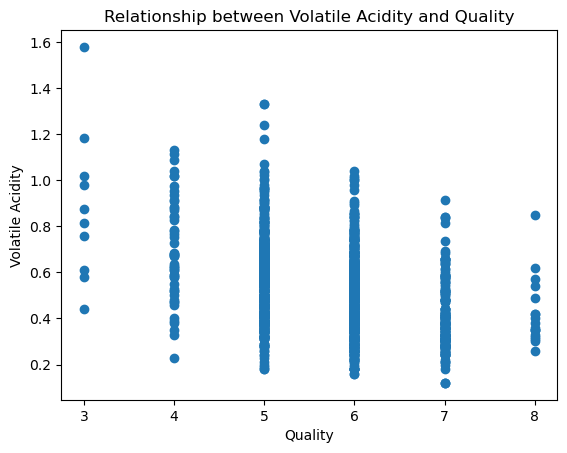

In [209]:
plt.scatter(x=redwine_data['quality'], y=redwine_data['volatile acidity'])
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.title('Relationship between Volatile Acidity and Quality')
plt.show()

As quality of wine increases (moves closer to 8), the volatile acidity decreases.

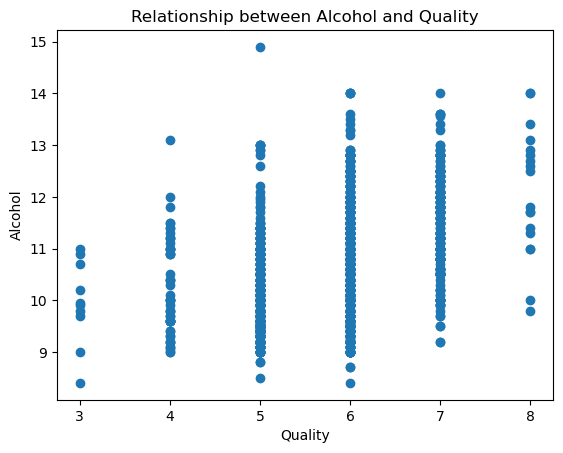

In [210]:
plt.scatter(x=redwine_data['quality'], y=redwine_data['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Relationship between Alcohol and Quality')
plt.show()

As quality increases (moves closer to 8), alcohol increases.

### Exploring the White Wine Data

In [211]:
whitewine_data = pd.read_csv("C:/Users/kayly/OneDrive/Desktop/MSDS/DSC550/Final Project/winequality-white.csv", sep=';')
whitewine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [212]:
# Find shape of dataframe
whitewine_data.shape

(4898, 12)

In [213]:
# Find number of NaNs in each column
whitewine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [214]:
# Check datatypes
whitewine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [215]:
whitewine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Visualizations from White Wine Data

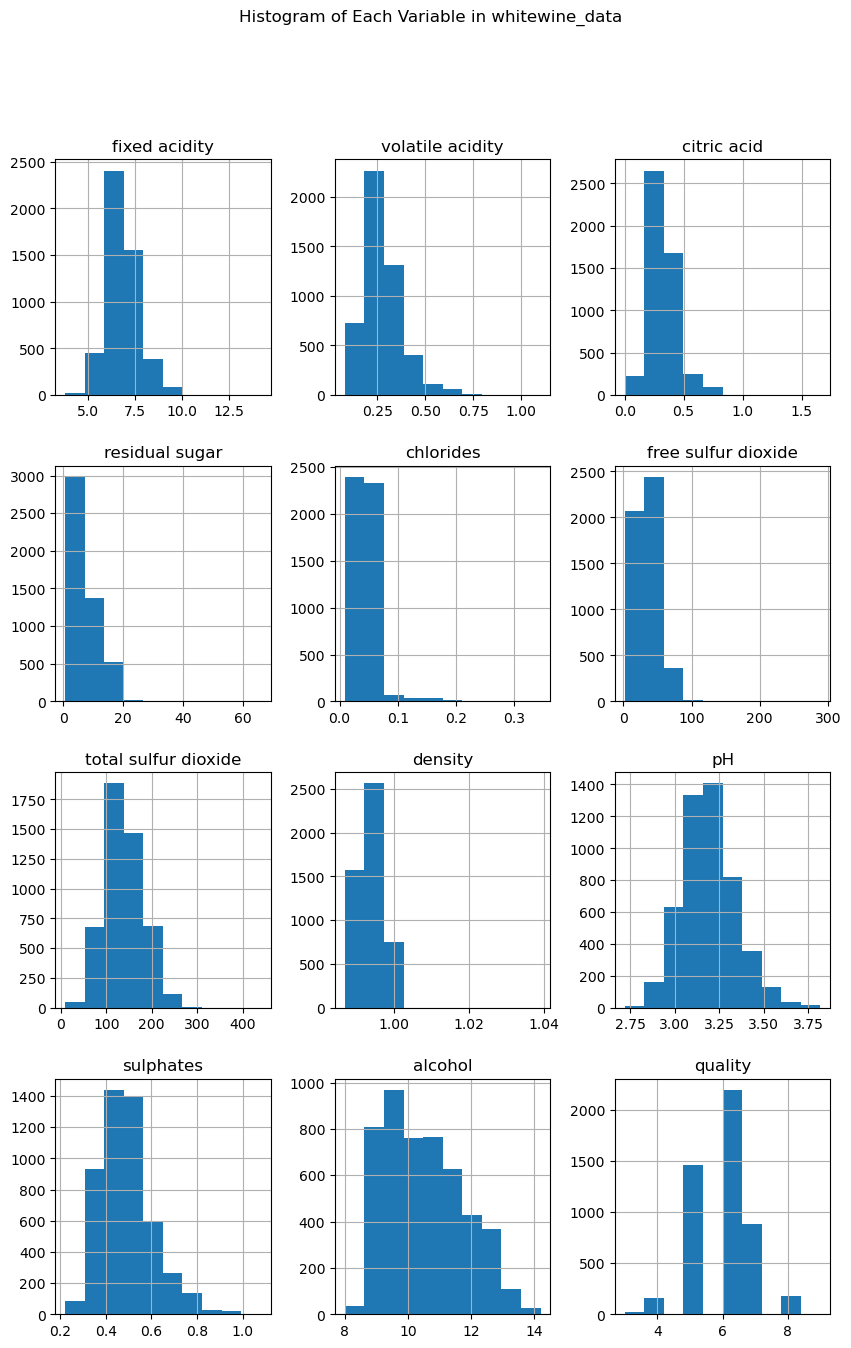

In [216]:
# Histogram of each variable in whitewine_data
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,15))
fig.suptitle('Histogram of Each Variable in whitewine_data')
whitewine_data.hist(column='fixed acidity', ax=axes[0,0])
whitewine_data.hist(column='volatile acidity', ax=axes[0,1])
whitewine_data.hist(column='citric acid', ax=axes[0,2])
whitewine_data.hist(column='residual sugar', ax=axes[1,0])
whitewine_data.hist(column='chlorides', ax=axes[1,1])
whitewine_data.hist(column='free sulfur dioxide', ax=axes[1,2])
whitewine_data.hist(column='total sulfur dioxide', ax=axes[2,0])
whitewine_data.hist(column='density', ax=axes[2,1])
whitewine_data.hist(column='pH', ax=axes[2,2])
whitewine_data.hist(column='sulphates', ax=axes[3,0])
whitewine_data.hist(column='alcohol', ax=axes[3,1])
whitewine_data.hist(column='quality', ax=axes[3,2])
plt.show()

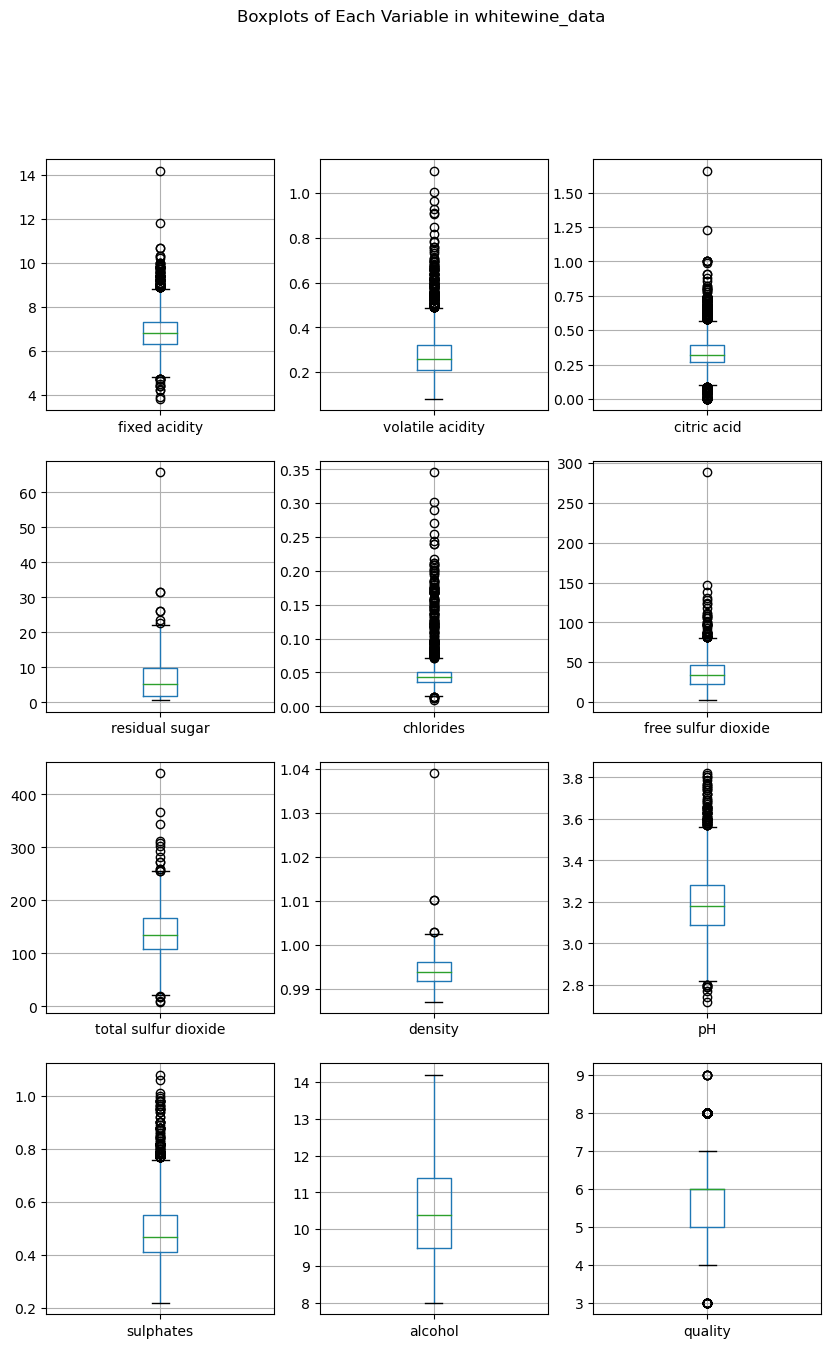

In [217]:
# Boxplots of each variable in whitewine_data
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,15))
fig.suptitle('Boxplots of Each Variable in whitewine_data')
whitewine_data.boxplot(column='fixed acidity', ax=axes[0,0])
whitewine_data.boxplot(column='volatile acidity', ax=axes[0,1])
whitewine_data.boxplot(column='citric acid', ax=axes[0,2])
whitewine_data.boxplot(column='residual sugar', ax=axes[1,0])
whitewine_data.boxplot(column='chlorides', ax=axes[1,1])
whitewine_data.boxplot(column='free sulfur dioxide', ax=axes[1,2])
whitewine_data.boxplot(column='total sulfur dioxide', ax=axes[2,0])
whitewine_data.boxplot(column='density', ax=axes[2,1])
whitewine_data.boxplot(column='pH', ax=axes[2,2])
whitewine_data.boxplot(column='sulphates', ax=axes[3,0])
whitewine_data.boxplot(column='alcohol', ax=axes[3,1])
whitewine_data.boxplot(column='quality', ax=axes[3,2])
plt.show()

<Axes: >

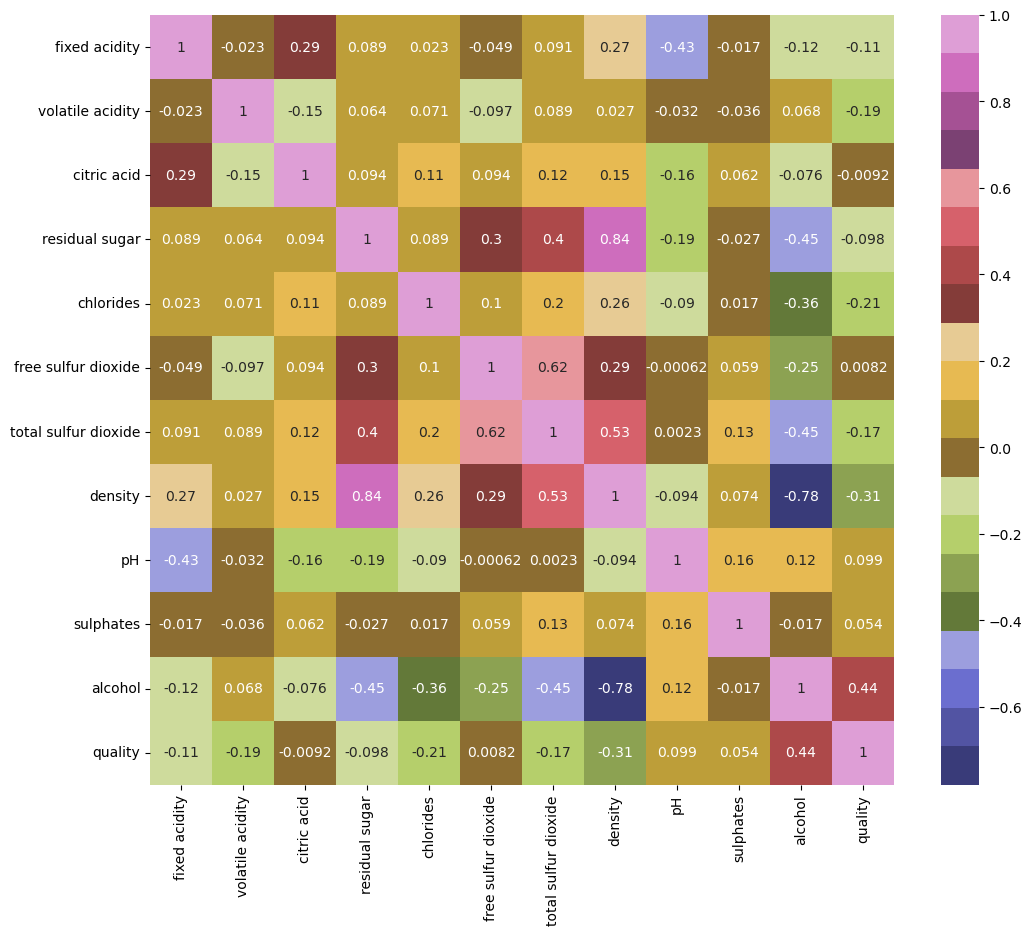

In [218]:
# Correlation
# Heatmap displaying correlation of each variable
corr = whitewine_data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cmap='tab20b')

Text(0.5, 1.0, 'Correlation of Variables with Quality for White Wine Dataset')

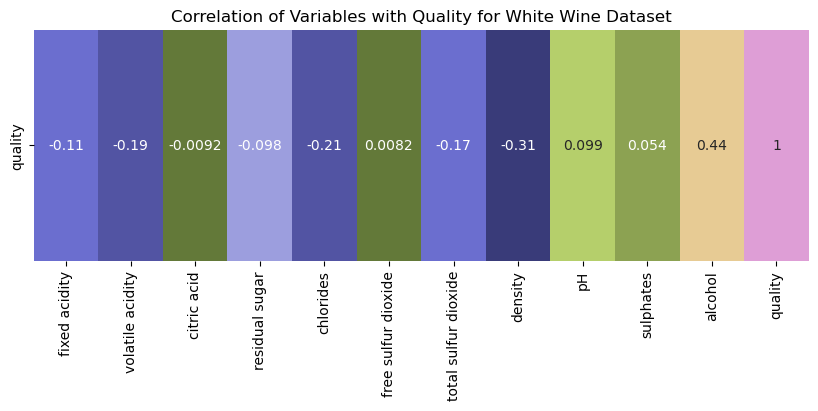

In [219]:
# Correlation matrix of each feature with quality
plt.figure(figsize=(10,3))
sns.heatmap(whitewine_data.corr().loc[['quality'],:],annot=True,cmap='tab20b',cbar=False)
plt.title('Correlation of Variables with Quality for White Wine Dataset')

Similar to in the red wine dataset, there are no variables that are very strongly correlated with quality. Alcohol and density appear to have the highest correlation. I will explore these variables further.

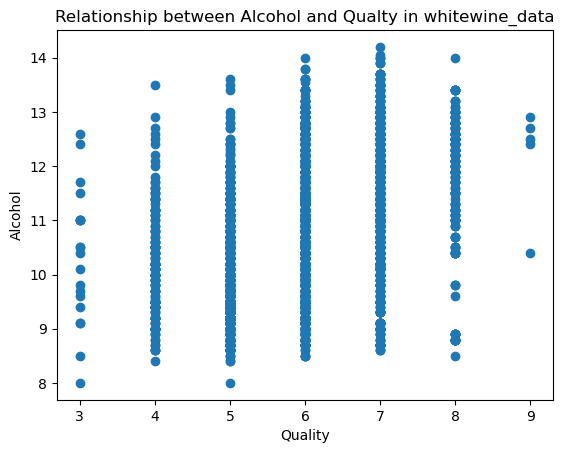

In [220]:
# Scatter plot of alcohol and quality
plt.scatter(x=whitewine_data['quality'], y=whitewine_data['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Relationship between Alcohol and Qualty in whitewine_data')
plt.show()

The scatter plot of alcohol and quality confirms the findings in the correlation table; there is a slight positive relationship between te variables. As quality increases, alcohol also increases. 

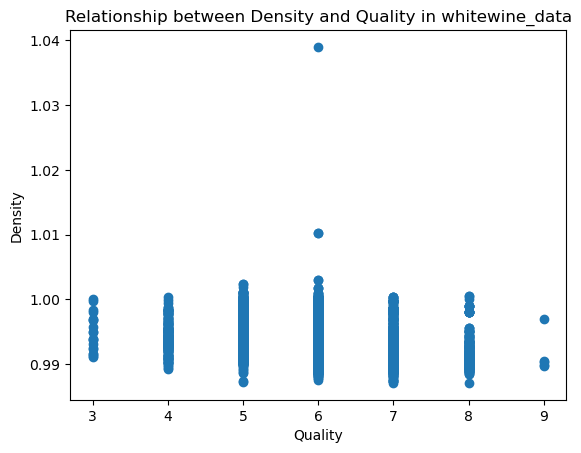

In [221]:
# Scatter plot of density and quality
plt.scatter(x=whitewine_data['quality'], y=whitewine_data['density'])
plt.xlabel('Quality')
plt.ylabel('Density')
plt.title('Relationship between Density and Quality in whitewine_data')
plt.show()

The scatter plot shows a small negative relationship between density and quality. As quality increases, density slightly decreases. 

# Milestone 2- Data Cleaning
I got lucky and chose a dataset that is very clean. In each dataset, there are no variables that have a strong relationship with quality. Because I plan to create a model that predicts quality, I need to retain all predictor variables, for this reason I will not be dropping any columns.

In [222]:
# Checking unique values in redwine_data
redwine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [223]:
# Checking unique values in whitewine_data
whitewine_data['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

At this point, I need to decide what is considered 'good' wine and what is considered 'bad' wine. 

In the initial study, wines could be ranked from 1 to 10, with 1 being the worst. However, the red wine dataset only contains values from 3 to 7 and the white wine data only contains values from 3 to 9. 

As a business owner, I would want to be very sure of my rating of 'good'. For this reason, I will only consider wines of 7 or higher 'good'. All other wines will be considered 'bad'.

In [224]:
# Add column for quality rating of good/bad
# Wines with a score >= 7 are good, while those with < 7 are bad
for row in redwine_data:
    redwine_data['quality rating'] = np.where(redwine_data['quality'] >= 7, 'good', 'bad')
    
# Get dummy columns for quality rating
dummies_red = pd.get_dummies(redwine_data['quality rating'], prefix = 'rating', drop_first=True) # Get dummies
redwine_data = pd.concat([redwine_data, dummies_red], axis=1) # Add dummy column to dataframe
redwine_data.drop('quality rating', axis=1, inplace=True) # Remove original column

redwine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating_good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False


In [225]:
# Add column for quality rating of good/bad
# Wines with a score >= 7 are good, while those with < 7 are bad
for row in redwine_data:
    whitewine_data['quality rating'] = np.where(whitewine_data['quality'] >= 7, 'good', 'bad')
    
# Get dummy columns for quality rating
dummies_white = pd.get_dummies(whitewine_data['quality rating'], prefix = 'rating', drop_first=True) # Get dummies
whitewine_data = pd.concat([whitewine_data, dummies_white], axis=1) # Add dummy column to dataframe
whitewine_data.drop('quality rating', axis=1, inplace=True) # Remove original column

whitewine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating_good
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False


In [226]:
# Checking how many of each good and bad observation are in each dataset
print("Number of 'good' ratings in red wine dataset: ", redwine_data['rating_good'].value_counts()[1])
print("Number of 'bad' ratings in red wine dataset: ", redwine_data['rating_good'].value_counts()[0])
print('-'*60)
print("Number of 'good' ratings in white wine dataset: ", whitewine_data['rating_good'].value_counts()[1])
print("Number of 'bad' ratings in white wine dataset: ", whitewine_data['rating_good'].value_counts()[0])

Number of 'good' ratings in red wine dataset:  217
Number of 'bad' ratings in red wine dataset:  1382
------------------------------------------------------------
Number of 'good' ratings in white wine dataset:  1060
Number of 'bad' ratings in white wine dataset:  3838


In both datasets, we see many more bad wines than good wines. This is to be expected, because only wines with a quality >=7 are considered good. 

Although quality information is now being captured in the reating_good column, I still do not want to remove the quality column. I may decide later down the line that I have chosen either too strict or too weak guidlines for what is considered good. If I delete this column, I lose the original values and cannot re-evaluate. In the model building stage, I will excude the quality column as a predictor (feature). 

In [227]:
# Checking how many of each quality rating are in the red wine dataset
redwine_data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [228]:
# Checking how many of each quality rating are in the white wine dataset
whitewine_data['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In milestone 1, I noted that there are quality outliers in each dataset. I initially considered removing these outliers, however I think keeping them in the datasets may be advantageous because they show what the qualities of a really good wine vs a really bad wine. Once I begin building my model, I may need to check accuracy scores with and without the outliers to determine if keeping them in is truly justified. For now, I would rather have more data than not enough so I will keep them in.

# Milestone 3- Model Building and Evaluation

The target variable in my data is a categorical variable, this means I need to use a classification model. To find the best model, I plan to use cross validation to select the best classifier and best hyper-parameters for that classifier. The below is a list of classifiers I plan to examine:

<ul>
    
    Logistic regression
    KNN
    Random forest
    Naive bayes classification
    
<ul>

In [229]:
# Load libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

## Red Wine Model

In [230]:
redwine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating_good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False


In [231]:
# Check values counts of True vs False in rating_good
redwine_data['rating_good'].value_counts()

rating_good
False    1382
True      217
Name: count, dtype: int64

The above value counts indicate there are many more False observations than True observations in the dataset. It will likely be necessary to account for this difference in the model. 

In [232]:
# Identify features and target
features_red = redwine_data.iloc[:,:10]
target_red = redwine_data['rating_good']

# Split into test and training set
features_red_train, features_red_test, target_red_train, target_red_test = train_test_split(
    features_red, target_red, random_state=1)

In [233]:
# Checking lengths of training and test set 
print("Length of features training set: ", len(features_red_train))
print("Length of target training set: ", len(target_red_train))
print("Length of features test set: ", len(features_red_test))
print("Length of target test set: ", len(target_red_test))

Length of features training set:  1199
Length of target training set:  1199
Length of features test set:  400
Length of target test set:  400


### Red Wine Model

In [234]:
# Create a pipeline
pipe_red = Pipeline([("classifier", LogisticRegression())]) # LogisticRegression is just a placeholder for the best classifier

In [235]:
# Create search space
search_space_red = [{"classifier": [LogisticRegression(max_iter=500)],},
                   {"classifier": [KNeighborsClassifier()],
                   "classifier__n_neighbors":[1,2,3,4,5,6,7,8,9,10]},
                   {"classifier": [RandomForestClassifier()],
                   "classifier__n_estimators": [10,100,1000]},
                   {"classifier": [GaussianNB()]},
                   {"classifier":[DecisionTreeClassifier()],
                   "classifier__splitter": ['best','random']}]

In [236]:
# Create grid search
gridsearch_red = GridSearchCV(pipe_red, search_space_red, cv=5, verbose=0, scoring='accuracy')

In [237]:
# Fit best model
best_model_red = gridsearch_red.fit(features_red_train, target_red_train)

In [238]:
# Find best parameters
gridsearch_red.best_params_

{'classifier': RandomForestClassifier(), 'classifier__n_estimators': 1000}

In [239]:
# Make predictions
predictions_red = best_model_red.predict(features_red_test)

# Check accuracy
print("Accuracy: ", accuracy_score(target_red_test, predictions_red))

Accuracy:  0.925


For my first model, a 92% accuracy is amazing!

Text(0.5, 1.0, 'Confusion Matrix for Red Wine Dataset Model 1')

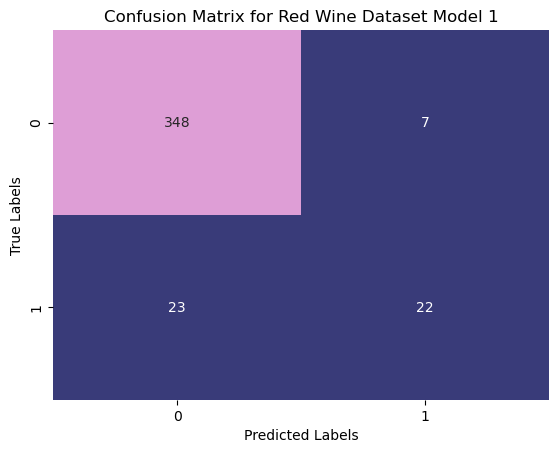

In [241]:
conf_red = confusion_matrix(target_red_test, predictions_red)

ax=plt.subplot()
sns.heatmap(conf_red, annot=True, fmt='g',cbar=False, cmap='tab20b')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for Red Wine Dataset Model 1')

False positive rates would be costly to the wine store (we don't want to tell someone a wine is good when it actually isn't, this would alienate our customer base). For this reason, we want to be sure that the model has a minimal number of false positives. The top right box value in the above confusion matrix represents false positive values. This number is low, so again, this model seems like a good fit.

In [242]:
# Find F1-score
print("F1-Score: ", f1_score(target_red_test, predictions_red))

F1-Score:  0.5945945945945946


Precision shows how often the model correctly predicts positive predictions. Recall represents how well a model correctly predicts true positive predicitons. The F1-score combines precision and recall into one metric. 

An F1-score of 0.60 indicates that the model correctly predicts positive values 60% of the time.


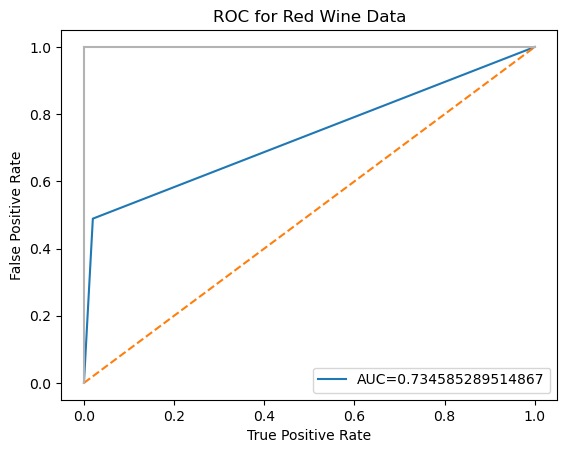

In [243]:
# Calculate ROC
fpr_red, tpr_red, _ = roc_curve(target_red_test, predictions_red)

# Calculate area under curve (AUC)
auc_red = roc_auc_score(target_red_test, predictions_red)

plt.plot(fpr_red, tpr_red,label="AUC="+str(auc_red)) # Plots ROC and adds AUC to plot
plt.plot([0,1],ls="--") # Shows model that predicts at random
plt.plot([0,0],[1,0], c="0.7"), plt.plot([1,1],c="0.7") # Shows model that predicts everything correctly
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC for Red Wine Data')
plt.legend(loc=4)
plt.show()

From the ROC curve, I can see that this model predicts better than at random, but not as well as a perfect model. The AUC tells us there is a 73% chance the model will be able to distinguish between good and bad wine. This is different than the above accuracy value.

## White Wine Model

In [244]:
whitewine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating_good
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False


In [245]:
# Separate data into features and test
features_white = whitewine_data.iloc[:,:10]
target_white = whitewine_data['rating_good']

In [246]:
# Split into training and test set
features_white_train, features_white_test, target_white_train, target_white_test = train_test_split(
    features_white, target_white, random_state=1)

In [247]:
# Create pipeline
pipe_white = Pipeline([("classifier", LogisticRegression())]) # Logistic regression is just a placeholder for the best classifier

In [248]:
# Create search space
search_space_white = [{"classifier":[LogisticRegression(max_iter=750)]},
                     {"classifier":[KNeighborsClassifier(n_jobs=-1)],
                     "classifier__n_neighbors":[1,2,3,4,5,6,7,8,9,10]},
                     {"classifier": [RandomForestClassifier()],
                     "classifier__n_estimators":[10, 100, 1000]}]

In [249]:
# Create grid search
gridsearch_white = GridSearchCV(pipe_white, search_space_white, cv=5, verbose=0, scoring='accuracy')

In [250]:
# Fit best model
best_model_white = gridsearch_white.fit(features_white_train, target_white_train)

In [251]:
# Find best parameters
best_model_white.best_params_

{'classifier': RandomForestClassifier(), 'classifier__n_estimators': 100}

In [252]:
# Make predictions
predictions_white = best_model_white.predict(features_white_test)

# Check accuracy
print("Accuracy: ", accuracy_score(target_white_test, predictions_white))

Accuracy:  0.8791836734693877


The accuracy score in this dataset is 87% which is still pretty good! 

Text(0.5, 1.0, 'Confusion Matrix for White Wine Dataset Model 1')

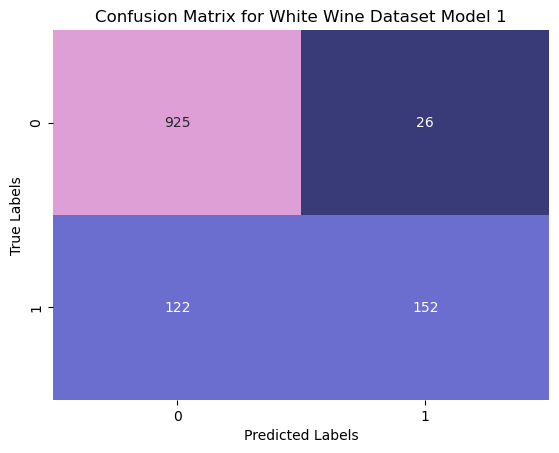

In [253]:
conf_white = confusion_matrix(target_white_test, predictions_white)

ax=plt.subplot()
sns.heatmap(conf_white, annot=True, fmt='g',cbar=False, cmap='tab20b')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for White Wine Dataset Model 1')

This model produces a low amount of false positives (top right value), but a relatively high number of false negative rates (bottom left value). We want to make sure we are only recommending wine as 'good' when it is actually good, so the false positive rate should be low. However, we also don't want to not recommend wine that is actually good because it's labeled as 'bad'. There might be some more work to be done to reduce the false negative rate.

In [254]:
# Find F1-score
print("F1-Score: ", f1_score(target_white_test, predictions_white))

F1-Score:  0.672566371681416


This model correctly predicts positive values 67% of the time (this is better than the previous model for red wine).

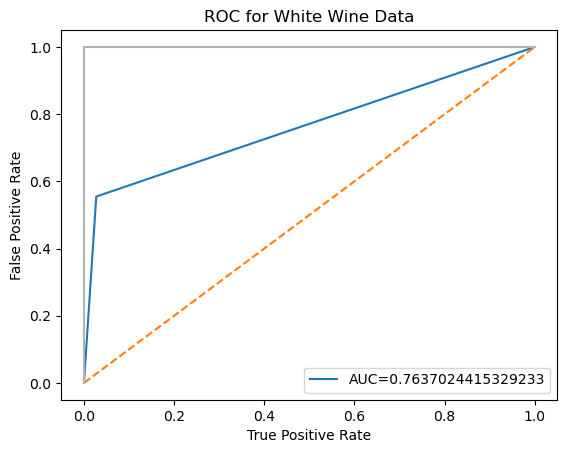

In [255]:
# Calculate ROC
fpr_white, tpr_white, _ = roc_curve(target_white_test, predictions_white)

# Calculate area under curve (AUC)
auc_white = roc_auc_score(target_white_test, predictions_white)

plt.plot(fpr_white, tpr_white,label="AUC="+str(auc_white)) # Plots ROC and adds AUC to plot
plt.plot([0,1],ls="--") # Shows model that predicts at random
plt.plot([0,0],[1,0], c="0.7"), plt.plot([1,1],c="0.7") # Shows model that predicts everything correctly
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC for White Wine Data')
plt.legend(loc=4)
plt.show()

From the ROC curve, I can see that this model makes predictions better than at random, but not as good as a perfect model. From the AUC, I learned that there is a 76% chance this model can distinguish between good and bad wine.

### Summary:

For my first attempts at building models for these datasts, I feel these model are pretty good! There is definitley some room for improvement though. I think I could best improve these by focusing more on feature selection. It might be useful to try features selection techniques to include only the most essential features.

# Milestone 4- A few minor updates

I got pretty good accuracy on my previous models, but I think they can be improved by applying a scaler to the data. In milestone 1, I showed that this dataset is not normally distributed so StandardScaler will not work. Instead, I will use MinMaxScaler. 

Another route for possible accuracy improvement is dimensionality reduction. There are only 11 features in each dataset so normally I would not even explore this route. However, none of the features have a strong correlation with the target variable. Dimensionality reduction might be able to produce new features with stronger correlation to the target variable thereby increasing accuracy of the model. 

In [256]:
# Load libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

### Red Wine Dataset

In [257]:
# Create min-max scaler
minmax_scale = MinMaxScaler(feature_range=(0,1))

# Create pca
pca = PCA(n_components=0.90, whiten=True)

In [258]:
pipe_red2 = Pipeline([("minmax", minmax_scale),("pca", pca),("classifier", LogisticRegression())])

In [259]:
# Create grid search
gridsearch_red2 = GridSearchCV(pipe_red2, search_space_red, cv=5, verbose=0, scoring='accuracy')

# Fit best model
best_model_red2 = gridsearch_red2.fit(features_red_train, target_red_train)

# Find best parameters
gridsearch_red2.best_params_

{'classifier': RandomForestClassifier(), 'classifier__n_estimators': 1000}

In [260]:
# Make predictions
predictions_red2 = best_model_red2.predict(features_red_test)

# Check accuracy
print("Accuracy of Scaled + PCA Model: ", accuracy_score(target_red_test, predictions_red2))
print("Accuracy of Original Model: ", accuracy_score(target_red_test, predictions_red))

Accuracy of Scaled + PCA Model:  0.89
Accuracy of Original Model:  0.925


In [261]:
# Find F1-score
print("F1-Score of Scaled + PCA Model: ", f1_score(target_red_test, predictions_red2))
print("F1-Score of Original Model: ", f1_score(target_red_test, predictions_red))

F1-Score of Scaled + PCA Model:  0.3888888888888889
F1-Score of Original Model:  0.5945945945945946


Confusion Matrix of Scaled + PCA Model: 
 [[348   7]
 [ 23  22]]
Confusion Matrix of Original Model: 
 [[348   7]
 [ 23  22]]


Text(0.5, 1.0, 'Confusion Matrix for Red Wine Dataset Model 2')

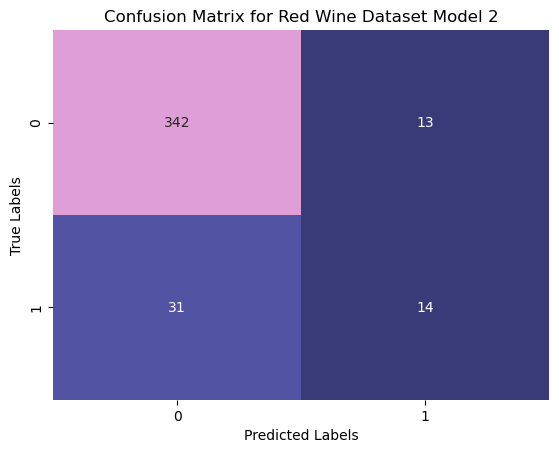

In [262]:
# Plot confusion matrix
ax=plt.subplot()
sns.heatmap(conf_red2, annot=True, fmt='g',cbar=False, cmap='tab20b')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for Red Wine Dataset Model 2')

The accuracy and F1 of predictions were decreased when minmax scaling and PCA were included in the model. There are also an increase in type I error (more false positives) and decrease in true positive values predicted. All these factors indicate that PCA is not a good fit for this dataset. 

It is important to consider that a 92% prediction accuracy was achieved in this dataset which is quite a feat. 

## White Wine Dataset

In [263]:
pipe_white2 = Pipeline([("minmax", minmax_scale),("pca", pca),("classifier", LogisticRegression())])

# Create grid search
gridsearch_white2 = GridSearchCV(pipe_white2, search_space_white, cv=5, verbose=0, scoring='accuracy')

# Fit best model
best_model_white2 = gridsearch_white2.fit(features_white_train, target_white_train)

# Find best parameters
gridsearch_white2.best_params_

{'classifier': RandomForestClassifier(), 'classifier__n_estimators': 100}

In [264]:
# Make predictions
predictions_white2 = best_model_white2.predict(features_white_test)

# Check accuracy
print("Accuracy of Scaled + PCA Model: ", accuracy_score(target_white_test, predictions_white2))
print("Accuracy of Non-Scaled Model: ", accuracy_score(target_white_test, predictions_white))

Accuracy of Scaled + PCA Model:  0.8457142857142858
Accuracy of Non-Scaled Model:  0.8791836734693877


In [265]:
# Find F1-score
print("F1-Score of Scaled + PCA Model: ", f1_score(target_white_test, predictions_white2))
print("F1-Score of Original Model: ", f1_score(target_white_test, predictions_white))

F1-Score of Scaled + PCA Model:  0.5286783042394015
F1-Score of Original Model:  0.672566371681416


Confusion Matrix of Scaled + PCA Model: 
 [[930  21]
 [168 106]]
Confusion Matrix of Original Model: 
 [[925  26]
 [122 152]]


Text(0.5, 1.0, 'Confusion Matrix for White Wine Dataset Model 2')

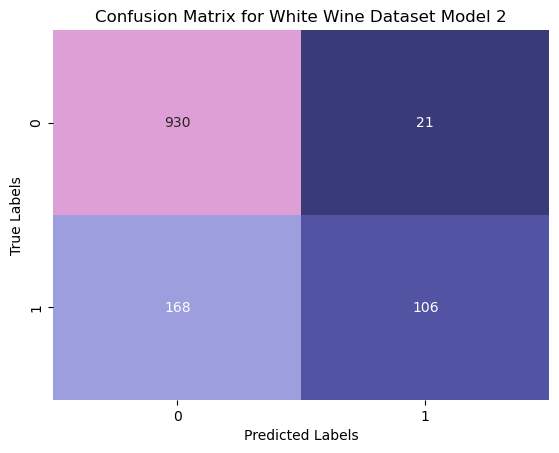

In [266]:
# Plot confusion matrix
ax=plt.subplot()
sns.heatmap(conf_white2, annot=True, fmt='g',cbar=False, cmap='tab20b')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for White Wine Dataset Model 2')

Just line with the red wine dataset, the accuracy and F1 of predictions were decreased when minmax scaling and PCA were included in the model. However, in this case there is a decrease in type I error (less false positives) and an increase in true positive values. This is an improvement from the original model. This improvement comes at a cost though; type II error (false negative rate) has increased in this model. 

Although the overall accuracy of this model decreased, this model is still an improvement from the original. In this case, we want to avoid type I error as much as possible. We do not want to tell a customer a wine is good, when it's actually bad. So the decrease in type II error is actually favorable. 